In [1]:
from os import listdir
from os.path import isfile, join
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import fiona
import shapely.geometry as sgeom
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib as mpl
from affine import Affine

In [122]:
#Busco los TIFF
doy='20210216'
#path='/media/andres/Elements1/GOES16/GRANIZO/'+doy+'/GLM/suma/'
folder='/media/andres/Elements1/LH/CMORPH/DATA/'+doy+'/'
output='/media/andres/Elements1/LH/CMORPH/DATA/'+doy+'/output/'
folder


'/media/andres/Elements1/LH/CMORPH/DATA/20210216/'

In [123]:
lista_tiff = [f for f in listdir(folder) if isfile(join(folder, f)) and f.endswith('.tif')]
lista_tiff.sort()

print('numero de files',len(lista_tiff))

lista_tiff

numero de files 1


['c2accum1dy_20210216_235959.tif']

In [124]:
nombre=lista_tiff[0]
nombre=nombre[0:25]
nombre

'c2accum1dy_20210216_23595'

In [125]:
#itero sobre la lista y abro con rasterio los tiff

print("Recorrer lista por Indices")
for x in range(0,len(lista_tiff)):
    
    
    lista_tiff[x]=rasterio.open(folder+lista_tiff[x])
    #name.append(x)=lista_tiff[x].read(1)
    #print (name)

#lista_tiff

Recorrer lista por Indices


In [126]:
lista_tiff[0]

<open DatasetReader name='/media/andres/Elements1/LH/CMORPH/DATA/20210216/c2accum1dy_20210216_235959.tif' mode='r'>

In [127]:
#paso mi lista a arrays
otra=[*lista_tiff]
for x in range(0,len(lista_tiff)):
    
    #otra[x]=lista_tiff[x]
    lista_tiff[x]=lista_tiff[x].read(1)

otra[0].dtypes

('float32',)

In [128]:
datos=lista_tiff[0]
datos

array([[ 2.1818181e-02,  2.6666667e-02,  2.6666667e-02, ...,
         2.1818181e-02,  2.1818181e-02,  2.6666667e-02],
       [ 1.2000000e-01,  1.5272728e-01,  1.0909091e-01, ...,
         1.2000000e-01,  1.2000000e-01,  1.5272728e-01],
       [ 8.5714288e-02,  1.1076923e-01,  7.3846154e-02, ...,
         8.5714288e-02,  8.5714288e-02,  1.1076923e-01],
       ...,
       [ 4.8000002e+00,  4.8000002e+00,  4.8000002e+00, ...,
         4.8000002e+00,  4.8000002e+00,  4.8000002e+00],
       [ 4.8000002e+00,  4.8000002e+00,  4.8000002e+00, ...,
         4.8000002e+00,  4.8000002e+00,  4.8000002e+00],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02]], dtype=float32)

In [129]:
otra[0].transform

Affine(0.05, 0.0, -0.05,
       0.0, -0.05, 90.00000000000001)

# Creo un nuevo affine

In [130]:
nuevo_affine=Affine.identity()
nuevo_affine=nuevo_affine.translation(-360, 90.00000000000001)*nuevo_affine.scale(0.05,-0.05)
nuevo_affine

Affine(0.05, 0.0, -360.0,
       0.0, -0.05, 90.00000000000001)

In [131]:
height=otra[0].shape[0]
height

3600

In [132]:
width=otra[0].shape[1]
width

7202

In [133]:
otra[0].bounds#< para extent

BoundingBox(left=-0.05, bottom=-89.99999999999999, right=360.05, top=90.00000000000001)

# guardo el geotiff

In [134]:
#new_dataset = rasterio.open(folder+'res/'+'SUMA_GOES_16_GLM'+doy+'.tif',
new_dataset = rasterio.open(output+nombre+'_correccion.tif',
     'w',
     driver='GTiff',
     height=height,
     width=width,
     count=1,
     dtype='float32',
     crs='+proj=latlong',
     transform=nuevo_affine) 

In [135]:
new_dataset.write(datos, 1)
new_dataset.close()

## LEVANTO TIFF GENERADO PARA GRAFICARLO


In [136]:
CMORPH_day=output+nombre+'_correccion.tif'
CMORPH_day

'/media/andres/Elements1/LH/CMORPH/DATA/20210216/output/c2accum1dy_20210216_23595_correccion.tif'

In [137]:
coso=rasterio.open(CMORPH_day)
coso.bounds

BoundingBox(left=-360.0, bottom=-89.99999999999999, right=0.10000000000002274, top=90.00000000000001)

In [138]:
extent_map=[-360, 0.1, -90, 90] #Extensión para Cartop del raster original
#extent_map2=[-80, -52, -58, -20] #Extensión para Cartop del recorte (Argentina)
extent_map2=[-75,-53,-25,-42] #Extensión para Cartop del recorte (Región centro)

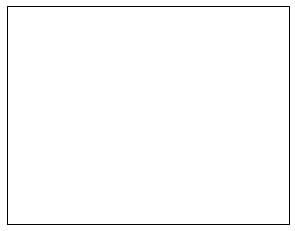

In [139]:
# Definición de ejes
ax = plt.axes(projection=ccrs.PlateCarree())#, globe=globe))
ax.set_extent(extent_map2, crs=ccrs.PlateCarree())

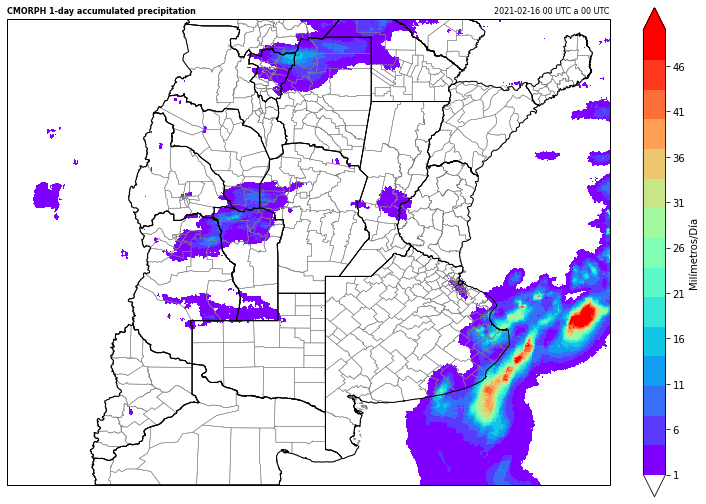

In [141]:
#viridis = cm.get_cmap('plasma', 15) 
viridis = cm.get_cmap('rainbow', 15)
    
cmap=mpl.colors.ListedColormap(viridis(range(15)))

cmap = cm.get_cmap(cmap, 15) 

#cmap.set_over('alpha=0')
cmap.set_over('red')
cmap.set_under('white')

#cmap

plt.figure(figsize=(12,9))
# Definición de ejes
ax = plt.axes(projection=ccrs.PlateCarree())#, globe=globe))
ax.set_extent(extent_map2, crs=ccrs.PlateCarree())

# Add a background image
ax.stock_img()
                

with rasterio.open(CMORPH_day, 'r') as src:
    # read image into ndarray
        im = src.read(1, masked=True)
crs=ccrs.PlateCarree()
# Ploteo la imagen
img_plot = ax.imshow(im, vmin=1, vmax=50, origin='upper',  extent=extent_map, cmap=cmap, transform= crs)




shpfile = "/media/andres/Elements1/GOES16/Argencon/Shapes/Departamentos_filtrados.shp"

with fiona.open(shpfile) as records:
        geometries = [sgeom.shape(shp['geometry'])
                      for shp in records]
        
#Agrego a la figura cada uno de los departamentos    
ax.add_geometries(geometries, ccrs.PlateCarree(),
                  edgecolor='gray', facecolor='none', linewidth=0.5)



shpfile = "/media/andres/Elements1/GOES16/SHAPES/008_limites_provinciales.shp"

with fiona.open(shpfile) as records:
        geometries = [sgeom.shape(shp['geometry'])
                      for shp in records]
        
#Agrego a la figura cada uno de los departamentos    
ax.add_geometries(geometries, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='none', linewidth=1)



#bounds = [-6.0, -5.0, -4.0,-3.0,-2.0,-1.0,0.0, 1.0, 2.0, 3.0, 4.0]
#bounds = [15,14,13,12,11,10,9, 8, 7,6,5,4,3,2,1]
bounds = np.arange(1,50,5)

plt.colorbar(img_plot,extend='both',ticks=bounds,spacing='uniform',orientation='vertical',label='Milímetros/Día',pad=0.05, fraction=0.05)
        #mpl.cm.ScalarMappable(cmap=cmap),
        #cax=ax,
        #boundaries=[-10] + bounds + [10],
             
        #extendfrac='auto',

# Agrego un título
plt.title('CMORPH 1-day accumulated precipitation', fontweight='bold', fontsize=8, loc='left')
date='2021-02-16 00 UTC a 00 UTC'
plt.title(date, fontsize=8, loc='right')
#plt.title(date+'\nInicio: '+inicio+' UTC'+ ' Fin: '+fin+' UTC' , fontsize=8, loc='right')

#plt.savefig(folder+'FINAL/'+'GOES_16_GLM'+doy+'.png', dpi=600)
#plt.savefig(folder+'res/'+'MAX_GOES_16_GLM'+doy+'.png', dpi=150)

plt.show()

